# 4장. 가장 훌륭한 예측선

## 최소 제곱

In [10]:
import numpy as np

x = np.array([2, 4, 6, 8]) # 공부한 시간
y = np.array([81, 93, 91, 97]) # 성적

mx = np.mean(x) # x값 평균
my = np.mean(y) # y값 평균


def top(x, mx, y, my): # 분자 구하는 함수 (최소 제곱법의 분자식)
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d

dividend = top(x, mx, y, my) # 분자 (x와 y의 편차 곱의 합)
divisor = sum([(i-mx)**2 for i in x]) # 분모 (x의 편차 제곱의 합)

a = dividend / divisor # 기울기
b = my - (mx * a) # y 절편

print(f'x 평균: {mx}, y 평균: {my}')
print(f'분자: {dividend}, 분모: {divisor}')
print(f'기울기: {a}, y 절편: {b}')

x 평균: 5.0, y 평균: 90.5
분자: 46.0, 분모: 20.0
기울기: 2.3, y 절편: 79.0


## 평균 제곱 오차(MSE)

In [13]:
fake_a = 3 # 임의로 기울기 3 설정
fake_b = 76 # 임의로 y 절편 b 76 설정

def predict(x):
    return fake_a * x + fake_b

predict_result = []

for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print(f'공부시간: {x[i]}, 실제점수: {y[i]}, 예측점수: {predict(x[i])}')

n = len(x)
def mse(y, y_pred): # 평균제곱오차 식
    return (1/n) * sum((y - y_pred) ** 2)

print(f'평균제곱오차: {str(mse(y, predict_result))}') # 임의로 설정한 a와 b의 값의 오차는 약 11이라는 소리

공부시간: 2, 실제점수: 81, 예측점수: 82
공부시간: 4, 실제점수: 93, 예측점수: 88
공부시간: 6, 실제점수: 91, 예측점수: 94
공부시간: 8, 실제점수: 97, 예측점수: 100
평균제곱오차: 11.0


# 5장. 선형 회귀 모델: 먼저 긋고 수정하기

## 선형 회귀

epoch: 0, slope: 27.84, intercept: 5.43
epoch: 100, slope: 7.073858435872394, intercept: 50.51166161138297
epoch: 200, slope: 4.095999380762421, intercept: 68.28224379060177
epoch: 300, slope: 2.9756829100119027, intercept: 74.96781336233505
epoch: 400, slope: 2.5542024233262106, intercept: 77.48302865233052
epoch: 500, slope: 2.3956349066513707, intercept: 78.42929177728175


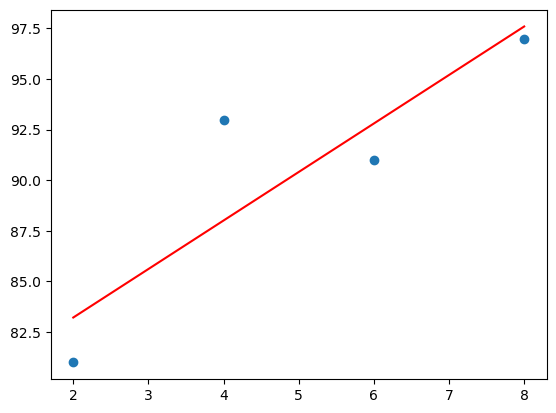

In [21]:
import matplotlib.pyplot as plt

def gd(a, b, x, y, lr): # 경사하강법 함수
    y_pred = a * x + b # 예측값 구하기
    error = y - y_pred # 실제값과 비교한 오차

    a_diff = (2/len(x)) * sum(-x * (error)) # 오차 함수를 a로 편미분
    b_diff = (2/len(x)) * sum(-(error)) # 오차 함수를 b로 편미분
    
    a = a - lr * a_diff # a 값 업데이트
    b = b - lr * b_diff # b 값 업데이트
    return a, b

a, b = 0, 0 # 기울기와 b 값 초기화
epoch = 501
lr = 0.03 # 학습률

for i in range(epoch):
    a, b = gd(a, b, x, y, lr)

    if i % 100 == 0:
        print(f'epoch: {i}, slope: {a}, intercept: {b}')

y_pred = a * x + b

plt.scatter(x, y)
plt.plot(x, y_pred, c='red')
plt.show()



## 다중 선형 회귀

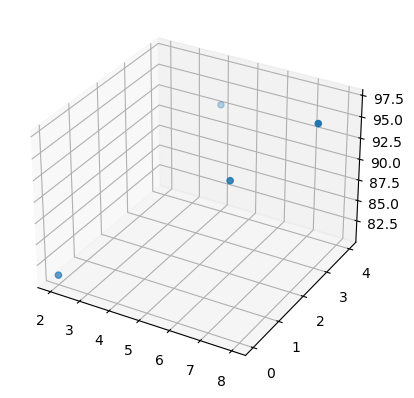

In [29]:
x1 = np.array([2, 4, 6, 8]) # 공부 시간
x2 = np.array([0, 4, 2, 3]) # 과외 시간
y = np.array([81, 93, 91, 97]) # 성적

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x1, x2, y)
plt.show()

In [37]:
a1, a2, b = 0, 0, 0 # 기울기와 b 값 초기화
epoch = 2001
lr = 0.01 # 학습률

def mgd(a1, a2, b, x1, x2, y, lr): # 경사하강법(다중)
    y_pred = a1 * x1 + a2 * x2 + b # 기울기와 절편 자리에 a1, a2, b 대입
    error = y - y_pred

    a1_diff = (2/len(x1)) * sum(-x1 * (error)) # 오차 함수를 a1로 편미분
    a2_diff = (2/len(x1)) * sum(-x2 * (error)) # 오차 함수를 a2로 편미분
    b_diff = (2/len(x1)) * sum(-(error)) # 오차 함수를 b로 편미분

    a1 = a1 - lr * a1_diff # a1값 업데이트
    a2 = a2 - lr * a2_diff # a2값 업데이트
    b = b - lr * b_diff # b값 업데이트
    return a1, a2, b

for i in range(epoch):
    a1, a2, b = mgd(a1, a2, b, x1, x2, y, lr)

    if i % 100 == 0:
        print(f'epoch: {i}, slope1:{a1}, slope2:{a2}, intercept:{b}')

y_pred = a1 * x1 + a2 * x2 + b
print(f'실제 점수: {y}, 예측 점수:{y_pred}')

epoch: 0, slope1:9.28, slope2:4.225, intercept:1.81
epoch: 100, slope1:9.510956338814555, slope2:5.027018426233063, intercept:22.920461683319775
epoch: 200, slope1:7.323827954174448, slope2:4.294955072797541, intercept:37.87505910521539
epoch: 300, slope1:5.738057638619613, slope2:3.7489166578034205, intercept:48.75893324300328
epoch: 400, slope1:4.584350585543426, slope2:3.350664098008261, intercept:56.68002177530537
epoch: 500, slope1:3.7447296153415963, slope2:3.0607682003770935, intercept:62.44483929346368
epoch: 600, slope1:3.1336711504844117, slope2:2.8497839410132944, intercept:66.64036322998972
epoch: 700, slope1:2.6889545962769894, slope2:2.6962334034508832, intercept:69.69378527432397
epoch: 800, slope1:2.3652984043790157, slope2:2.5844822454588168, intercept:71.91600741200855
epoch: 900, slope1:2.129747621424263, slope2:2.5031518900380703, intercept:73.5332981622058
epoch: 1000, slope1:1.9583182688188616, slope2:2.443961213535207, intercept:74.7103314237758
epoch: 1100, slop

## 텐서플로에서 실행하는 선형 회귀

Epoch 1/500
1/1 [==============================] - 0s 415ms/step - loss: 6708.5581
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 1823.7195
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 1100.8759
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 989.3603
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 967.6680
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 959.2031
Epoch 7/500
1/1 [==============================] - 0s 4ms/step - loss: 952.7150
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 946.5513
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 940.4690
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 934.4321
Epoch 11/500
1/1 [==============================] - 0s 4ms/step - loss: 928.4353
Epoch 12/500
1/1 [==============================] - 0s 5ms/step - loss: 922.4774
Epoch 13/500
1/1 [==============

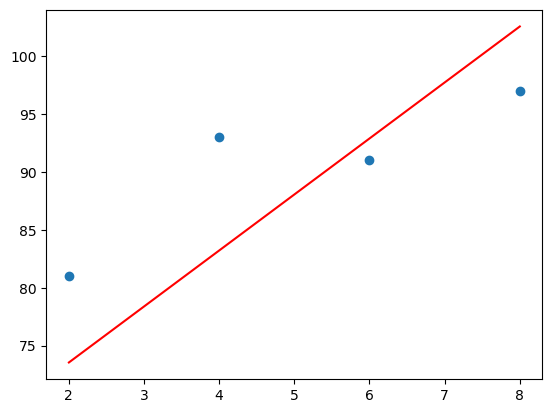

1/1 [==============================] - 0s 31ms/step
7, 예측 점수:[[97.71719]]


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear')) # Dense: 출력되는 값(성적), input_dim: 입력될 변수(학습시간)
model.compile(optimizer='sgd', loss='mse') # optimizer: sgd, 경사하강법
model.fit(x, y, epochs=500)

plt.scatter(x, y)
plt.plot(x, model.predict(x), c='red')
plt.show()

# 임의로 테스트
hour = 7
prediction = model.predict([hour])
print(f'{hour}, 예측 점수:{prediction}')

## 텐서플로에서 실행하는 다중 선형 회귀

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.array([[2, 0], [4, 4], [6, 2], [8, 3]])
y = np.array([81, 93, 91, 97])

model = Sequential()
model.add(Dense(1, input_dim=2, activation='linear')) # Dense: 출력되는 값(성적), input_dim: 입력될 변수(학습시간, 과외시간)
model.compile(optimizer='sgd', loss='mse') # optimizer: sgd, 경사하강법
model.fit(x, y, epochs=500)

# 임의로 테스트
hour, private_class = 7, 4
prediction = model.predict([[hour, private_class]])
print(f'공부시간: {hour}, 과외시간: {private_class}, 예측 점수:{prediction}')

Epoch 1/500
1/1 [==============================] - 0s 242ms/step - loss: 8700.7666
Epoch 2/500
1/1 [==============================] - 0s 3ms/step - loss: 1470.4094
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 956.4547
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 914.8977
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - loss: 906.5991
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 900.6740
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 894.9500
Epoch 8/500
1/1 [==============================] - 0s 5ms/step - loss: 889.2740
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 883.6351
Epoch 10/500
1/1 [==============================] - 0s 4ms/step - loss: 878.0324
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 872.4655
Epoch 12/500
1/1 [==============================] - 0s 4ms/step - loss: 866.9340
Epoch 13/500
1/1 [===============

# 6장. 로지스틱 회귀 모델: 참 거짓 판단

## 텐서플로에서 실행하는 로지스틱 회귀 모델

Epoch 1/2000
1/1 [==============================] - 0s 325ms/step - loss: 0.5524
Epoch 2/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5518
Epoch 3/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5513
Epoch 4/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5509
Epoch 5/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5504
Epoch 6/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5501
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5497
Epoch 8/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5494
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5490
Epoch 10/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5487
Epoch 11/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5484
Epoch 12/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5481
Epoch 13/2000
1/1 [============================

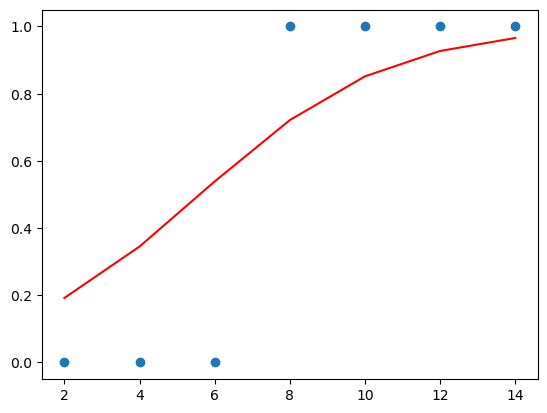

1/1 [==============================] - 0s 34ms/step
7, 합격 예상 확률:[[63.495617]]


In [59]:
# 손실함수: binary_crossentropy, 활성화함수: sigmoid

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid')) # Dense: 출력되는 값(성적), input_dim: 입력될 변수(학습시간)
model.compile(optimizer='sgd', loss='binary_crossentropy') # optimizer: sgd, 경사하강법
model.fit(x, y, epochs=2000)

plt.scatter(x, y)
plt.plot(x, model.predict(x), c='red')
plt.show()

# 임의로 테스트
hour = 7
prediction = model.predict([hour])
print(f'{hour}, 합격 예상 확률:{prediction*100}')